In [1]:
import requests

import torch

from PIL import Image, ImageDraw, ImageFont

from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_id = "IDEA-Research/grounding-dino-tiny"
model_id = "IDEA-Research/grounding-dino-base"
device = "cuda"

In [3]:
processor = AutoProcessor.from_pretrained(model_id)

model = AutoModelForZeroShotObjectDetection.from_pretrained(model_id).to(device)

Fetching 1 files: 100%|██████████| 1/1 [00:00<00:00, 10155.70it/s]


In [4]:
#image_url = "data_sirius/ffe4d45e24585d52577df35db6d8c885.jpg"
#image_url = "data_sirius/ff221d4ddf9ef0380d5da826cbb56044.jpg"
#image_url = "data_sirius/ffb19bb76b535aa258596939c39cc458.jpg"
image_url = "data_sirius/fa558a8c3a2d94063a94dd7601feae18.jpg"

image = Image.open(image_url)

Detected  with confidence 0.366 at location [442.49, 163.75, 811.04, 704.49]
Detected  with confidence 0.354 at location [443.01, 163.98, 810.71, 703.96]
Detected  with confidence 0.349 at location [37.53, 135.07, 1270.28, 691.17]
Detected  with confidence 0.321 at location [44.74, 154.21, 820.05, 698.55]
Detected  with confidence 0.26 at location [967.71, 165.77, 1275.86, 547.86]
Detected  with confidence 0.386 at location [967.84, 165.74, 1275.63, 548.17]
Detected  with confidence 0.259 at location [14.6, 21.84, 1268.98, 703.32]
Detected  with confidence 0.273 at location [40.03, 131.2, 1270.22, 691.38]
Detected  with confidence 0.334 at location [441.26, 162.93, 812.46, 704.59]
Detected  with confidence 0.272 at location [44.28, 154.4, 819.52, 697.63]
Detected  with confidence 0.259 at location [45.2, 167.62, 421.22, 546.65]
Detected  with confidence 0.254 at location [848.11, 3.86, 943.86, 536.63]


/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/transformers/models/grounding_dino/processing_grounding_dino.py:94: FutureWarning: The key `labels` is will return integer ids in `GroundingDinoProcessor.post_process_grounded_object_detection` output since v4.51.0. Use `text_labels` instead to retrieve string object names.
  warnings.warn(self.message, FutureWarning)


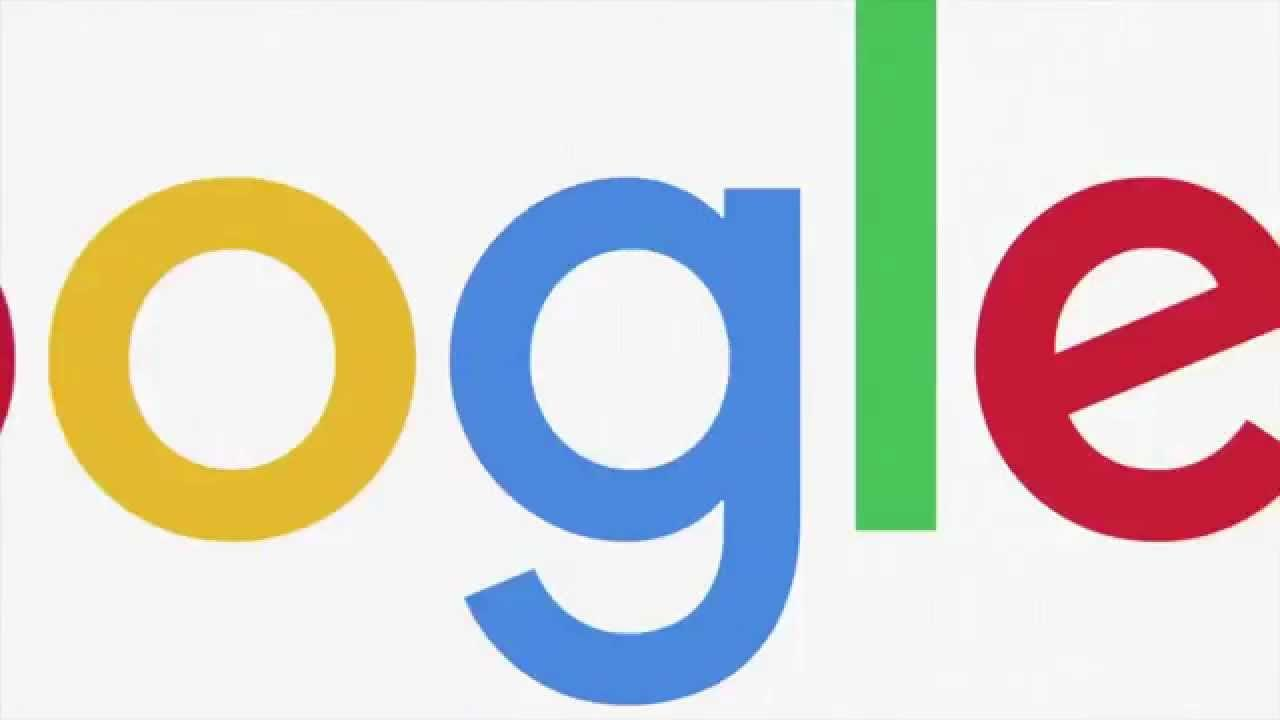

In [5]:
#image_url = "data_sirius/ffe4d45e24585d52577df35db6d8c885.jpg"
#image_url = "data_sirius/ff221d4ddf9ef0380d5da826cbb56044.jpg"
#image_url = "data_sirius/ffb19bb76b535aa258596939c39cc458.jpg"
image_url = "data_sirius/fa558a8c3a2d94063a94dd7601feae18.jpg"

image = Image.open(image_url)

text_labels = [["black letter T inside a yellow shield-like form"]]
text_labels = [[
    "T-Bank logo",
    #"stylized letter T inside a shield",
    #"yellow T logo in a shield",
    #"T-Bank symbol, shield with T",
    #"T-Bank logo, ignore 'Tinkoff' text"
]]
text_labels = [[
    "T-Bank logo",
    "stylized letter T inside a shield",
    #"yellow T logo in a shield",
    "T-Bank symbol, shield with T",
    "T-Bank logo, ignore 'Tinkoff' text"
]]

inputs = processor(images=image, text=text_labels, return_tensors="pt").to(device)

with torch.no_grad():
    outputs = model(**inputs)

results = processor.post_process_grounded_object_detection(
    outputs,
    inputs.input_ids,
    #box_threshold=0.4,
    text_threshold=0.7,
    target_sizes=[image.size[::-1]]
)

result = results[0]

for box, score, labels in zip(result["boxes"], result["scores"], result["labels"]):
    box = [round(x, 2) for x in box.tolist()]
    print(f"Detected {labels} with confidence {round(score.item(), 3)} at location {box}")

image_with_boxes = image.copy()
draw = ImageDraw.Draw(image_with_boxes)
font = ImageFont.load_default()

for box, score, label in zip(result["boxes"], result["scores"], result["labels"]):
    if score > 0.5:
        x1, y1, x2, y2 = box.tolist()
        
        draw.rectangle([x1, y1, x2, y2], outline="red", width=3)
        
        label_text = f"{label}: {score:.2f}"
        draw.rectangle([x1, y1-25, x1 + len(label_text)*10, y1], fill="red")
        draw.text((x1, y1-25), label_text, fill="white", font=font)

image_with_boxes.show()

image_with_boxes.save("detection_result.jpg")

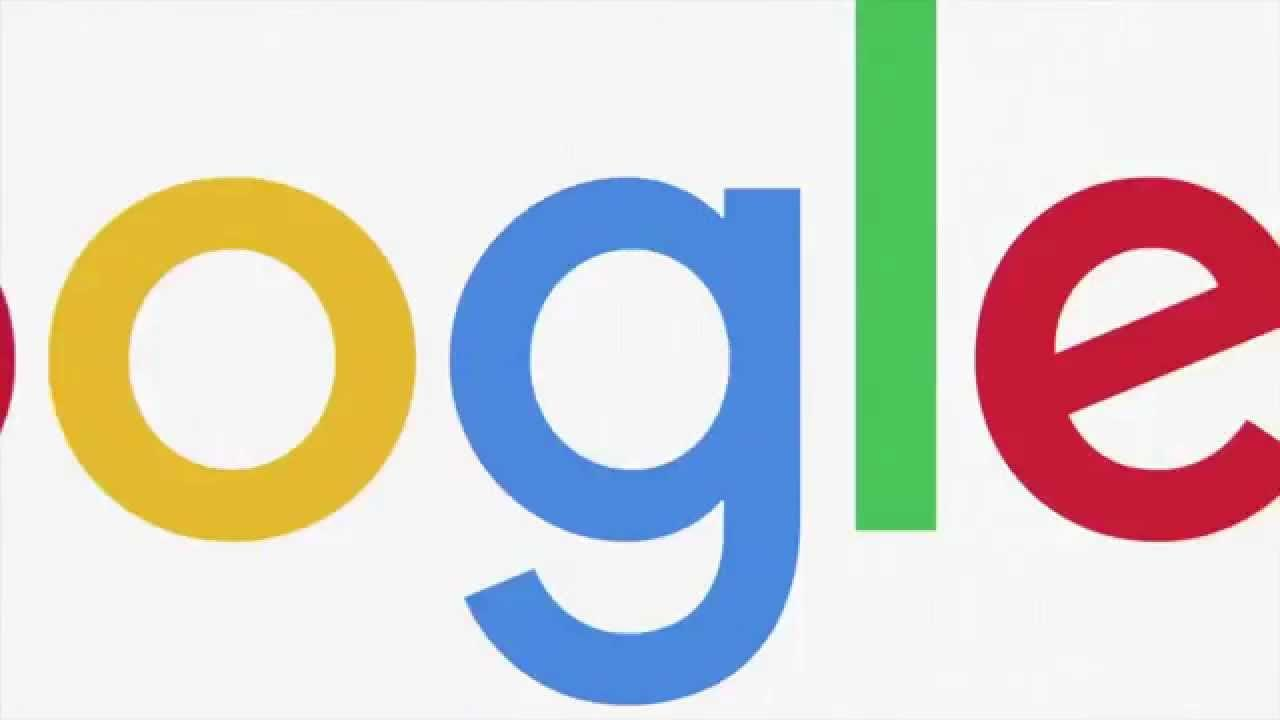

In [6]:
image_with_boxes = image.copy()
draw = ImageDraw.Draw(image_with_boxes)
font = ImageFont.load_default()

for box, score, label in zip(result["boxes"], result["scores"], result["labels"]):
    if score > 0.5:
        x1, y1, x2, y2 = box.tolist()
        
        draw.rectangle([x1, y1, x2, y2], outline="red", width=3)
        
        label_text = f"{label}: {score:.2f}"
        draw.rectangle([x1, y1-25, x1 + len(label_text)*10, y1], fill="red")
        draw.text((x1, y1-25), label_text, fill="white", font=font)

image_with_boxes.show()

image_with_boxes.save("detection_result.jpg")

In [7]:
import os
import random
from PIL import Image, ImageDraw, ImageFont
import torch
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import torch
import matplotlib.pyplot as plt
import os
import random


In [ ]:
import shutil

output_folder = "high_similarity_images"
os.makedirs(output_folder, exist_ok=True)

In [ ]:
image_folder = "data_sirius/"
reference_folder = "reference_logos/"
num_images_to_show = 10
text_labels = [[#"T-Bank logo",
                "letter T inside a shield-like form",
                "T-Bank logo, shield with T",
                "a yellow shield with black letter T inside",
                "a rectangle with letter T inside",
                " a white shield with black letter T inside",
                #"T-Bank logo, ignore 'Tinkoff' text"
                ]]
confidence_threshold = 0.4
similarity_threshold = 0.7 
all_images = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
if len(all_images) < num_images_to_show:
    print(f"В папке {image_folder} найдено только {len(all_images)} изображений. Будут показаны все.")
    selected_images = all_images
else:
    selected_images = random.sample(all_images, num_images_to_show)


In [ ]:
from skimage.metrics import structural_similarity as ssim

In [ ]:
def load_and_preprocess_reference(path):
    img = Image.open(path).convert("L")
    return np.array(img)

reference_logos = []
for ref_file in os.listdir(reference_folder):
    if ref_file.lower().endswith(('.png', '.jpg', '.jpeg')):
        ref_path = os.path.join(reference_folder, ref_file)
        ref_logo = load_and_preprocess_reference(ref_path)
        reference_logos.append(ref_logo)

if not reference_logos:
    raise ValueError(f"Не найдено ни одного эталонного изображения в папке {reference_folder}")

In [29]:
text_labels = [[#"T-Bank logo",
                "letter T inside a shield-like form",
                #"T-Bank logo, shield with T",
                "a yellow shield with black letter T inside ",
                "a white shield with black letter T inside",
                #"a rectangle with letter T inside",
                #"T-Bank logo, ignore 'Tinkoff' text"
                ]]

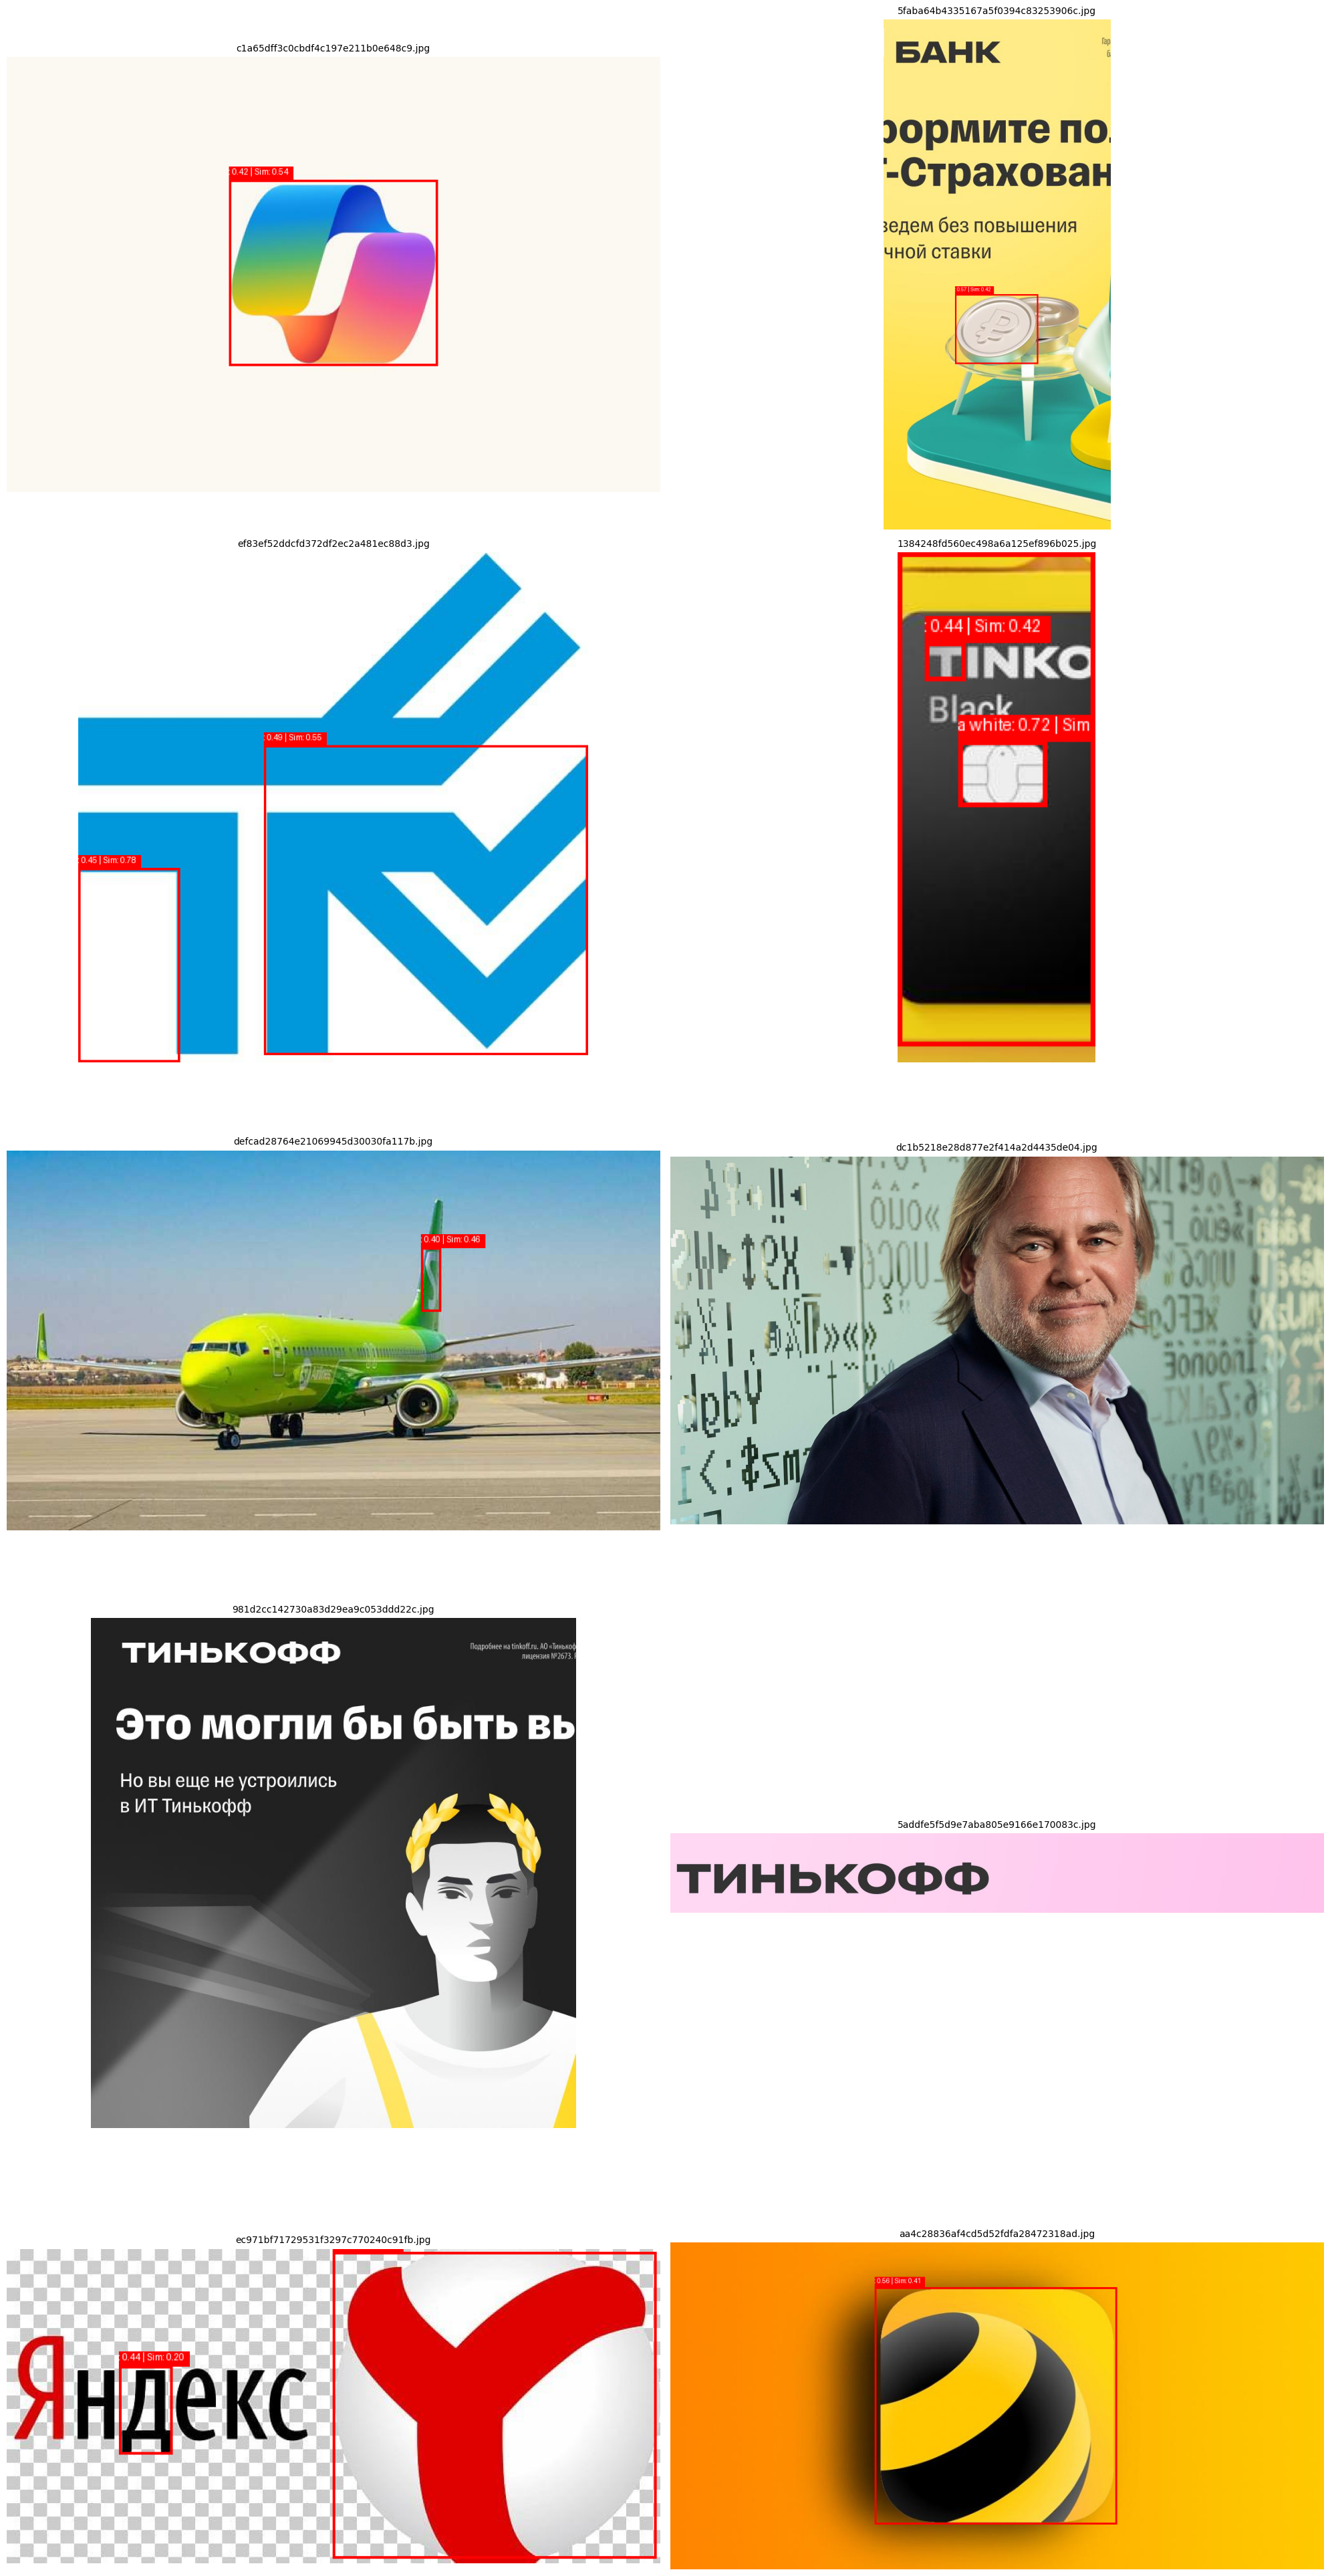

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(20, 40))
axes = axes.flatten()

for idx, img_filename in enumerate(selected_images):
    img_path = os.path.join(image_folder, img_filename)
    
    image = Image.open(img_path).convert("RGB")
    inputs = processor(images=image, text=text_labels, return_tensors="pt").to(device)
    
    with torch.no_grad():
        outputs = model(**inputs)
    
    results = processor.post_process_grounded_object_detection(
        outputs,
        inputs.input_ids,
        text_threshold=0.7,
        target_sizes=[image.size[::-1]]
    )
    
    result = results[0]
    
    image_with_boxes = image.copy()
    draw = ImageDraw.Draw(image_with_boxes)
    try:
        font = ImageFont.truetype("arial.ttf", 15)
    except IOError:
        font = ImageFont.load_default()

    # for box, score, label in zip(result["boxes"], result["scores"], result["labels"]):
    #     if score > confidence_threshold:
    #         x1, y1, x2, y2 = box.tolist()
    #         draw.rectangle([x1, y1, x2, y2], outline="red", width=3)
    #         label_text = f"{label}: {score:.2f}"
    #         text_bbox = draw.textbbox((0, 0), label_text, font=font)
    #         text_width = text_bbox[2] - text_bbox[0]
    #         text_height = text_bbox[3] - text_bbox[1]
    #         draw.rectangle([x1, y1 - text_height - 5, x1 + text_width + 5, y1], fill="red")
    #         draw.text((x1, y1 - text_height - 5), label_text, fill="white", font=font)
    image_cv = np.array(image.convert("L"))

    for box, score, label in zip(result["boxes"], result["scores"], result["labels"]):
        if score > confidence_threshold:
            x1, y1, x2, y2 = [int(coord) for coord in box.tolist()]
            
            draw.rectangle([x1, y1, x2, y2], outline="red", width=3)
            
            similarity_info = "Sim: N/A"
            if reference_logos:
                roi = image_cv[y1:y2, x1:x2]
                if roi.size > 0:
                    max_similarity = 0.0
                    for ref_logo in reference_logos:
                        resized_roi = cv2.resize(roi, (ref_logo.shape[1], ref_logo.shape[0]))
                        similarity = ssim(resized_roi, ref_logo, data_range=ref_logo.max() - ref_logo.min())

                    if similarity > max_similarity:
                        max_similarity = similarity
                    
                    similarity_info = f"Sim: {max_similarity:.2f}"

            label_text = f"{label}: {score:.2f} | {similarity_info}"
            text_bbox = draw.textbbox((0, 0), label_text, font=font)
            text_width = text_bbox[2] - text_bbox[0]
            text_height = text_bbox[3] - text_bbox[1]
            draw.rectangle([x1, y1 - text_height - 5, x1 + text_width + 5, y1], fill="red")
            draw.text((x1, y1 - text_height - 5), label_text, fill="white", font=font)
    
    ax = axes[idx]
    ax.imshow(image_with_boxes)
    ax.set_title(img_filename, fontsize=10)
    ax.axis('off')

for idx in range(len(selected_images), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import os
import random
from PIL import Image
import torch
import cv2
import numpy as np
import shutil
import json  

image_folder = "data_sirius/"
reference_folder = "reference_logos/"
output_folder = "high_similarity_images"
metadata_file = "detection_results.json"
num_images_to_process = 100
text_labels = [["T-Bank logo", "stylized letter T inside a shield", "T-Bank symbol, shield with T", "T-Bank logo, ignore 'Tinkoff' text"]]
confidence_threshold = 0.3
similarity_threshold = 0.6

os.makedirs(output_folder, exist_ok=True)

def load_and_preprocess_reference(path):
    img = Image.open(path).convert("L")
    return np.array(img)

reference_logos = []
for ref_file in os.listdir(reference_folder):
    if ref_file.lower().endswith(('.png', '.jpg', '.jpeg')):
        ref_path = os.path.join(reference_folder, ref_file)
        ref_logo = load_and_preprocess_reference(ref_path)
        reference_logos.append(ref_logo)

if not reference_logos:
    raise ValueError(f"Не найдено ни одного эталонного изображения в папке {reference_folder}")

all_images = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
if len(all_images) < num_images_to_process:
    print(f"В папке {image_folder} найдено только {len(all_images)} изображений. Будут обработаны все.")
    selected_images = all_images
else:
    selected_images = random.sample(all_images, num_images_to_process)

print(f"Начинаем обработку {len(selected_images)} изображений...")

detection_results = []

for idx, img_filename in enumerate(selected_images, 1):
    img_path = os.path.join(image_folder, img_filename)
    print(f"[{idx}/{len(selected_images)}] Обработка: {img_filename}")
    
    try:
        image = Image.open(img_path).convert("RGB")
        image_bw = image.convert("L").convert("RGB")
        
        inputs = processor(images=image_bw, text=text_labels, return_tensors="pt").to(device)
        
        with torch.no_grad():
            outputs = model(**inputs)
        
        results = processor.post_process_grounded_object_detection(
            outputs,
            inputs.input_ids,
            text_threshold=0.7,
            target_sizes=[image.size[::-1]]
        )
        
        result = results[0]
        image_cv = np.array(image.convert("L"))
        
        found_high_similarity = False
        detections_for_this_image = []

        for box, score, label in zip(result["boxes"], result["scores"], result["labels"]):
            if score > confidence_threshold:
                x1, y1, x2, y2 = [int(coord) for coord in box.tolist()]
                roi = image_cv[y1:y2, x1:x2]
                
                if roi.size == 0:
                    continue
                
                max_similarity = 0.0
                for ref_logo in reference_logos:
                    try:
                        from skimage.metrics import structural_similarity as ssim
                        resized_roi = cv2.resize(roi, (ref_logo.shape[1], ref_logo.shape[0]))
                        similarity = ssim(resized_roi, ref_logo, data_range=ref_logo.max() - ref_logo.min())
                    except ImportError:
                        resized_roi = cv2.resize(roi, (ref_logo.shape[1], ref_logo.shape[0]))
                        similarity = cv2.matchTemplate(resized_roi, ref_logo, cv2.TM_CCOEFF_NORMED)[0][0]
                    
                    if similarity > max_similarity:
                        max_similarity = similarity

                detection_info = {
                    "bbox": [x1, y1, x2, y2],
                    "model_score": round(score.item(), 3),
                    "label": label,
                    "similarity_score": round(max_similarity, 3)
                }
                detections_for_this_image.append(detection_info)
                
                if max_similarity > similarity_threshold:
                    found_high_similarity = True
                    print(f"Найдено совпадение: {label} (score={score:.3f}, sim={max_similarity:.3f})")

        if found_high_similarity:
            output_path = os.path.join(output_folder, img_filename)
            shutil.copy2(img_path, output_path)
            print(f"Сохранено в: {output_path}")
            
            detection_results.append({
                "image_filename": img_filename,
                "source_path": img_path,
                "saved_path": output_path,
                "detections": detections_for_this_image
            })
        else:
            print(f"Совпадений не найдено")
            # detection_results.append({
            #     "image_filename": img_filename,
            #     "source_path": img_path,
            #     "saved_path": None,
            #     "detections": detections_for_this_image
            # })
            
    except Exception as e:
        print(f"Ошибка при обработке {img_filename}: {str(e)}")
        continue

# --- Сохраняем все результаты в JSON файл ---
with open(metadata_file, 'w', encoding='utf-8') as f:
    json.dump(detection_results, f, indent=4, ensure_ascii=False)

print(f"Обработка завершена.")
print(f"Подходящие изображения сохранены в папку '{output_folder}'")
print(f"Информация о bounding box'ах и схожести сохранена в файл '{metadata_file}'")

Загружено 18 существующих записей из 'detection_results.json'
  📥 Сохранено в: high_similarity_images/2e9687a4043721ea080fc409d9f77d36.jpg


NameError: name 'datetime' is not defined

In [ ]:
image_folder = "data_sirius/"
reference_folder = "reference_logos/"
output_folder = "high_similarity_images"
metadata_file = "detection_results.json"
num_images_to_process = 10
text_labels = [["T-Bank logo", "stylized letter T inside a shield", "T-Bank symbol, shield with T", "T-Bank logo, ignore 'Tinkoff' text"]]
confidence_threshold = 0.3
similarity_threshold = 0.65

os.makedirs(output_folder, exist_ok=True)

def load_and_preprocess_reference(path):
    img = Image.open(path).convert("L")
    return np.array(img)

reference_logos = []
for ref_file in os.listdir(reference_folder):
    if ref_file.lower().endswith(('.png', '.jpg', '.jpeg')):
        ref_path = os.path.join(reference_folder, ref_file)
        ref_logo = load_and_preprocess_reference(ref_path)
        reference_logos.append(ref_logo)

if not reference_logos:
    raise ValueError(f"Не найдено ни одного эталонного изображения в папке {reference_folder}")

all_images = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
if len(all_images) < num_images_to_process:
    print(f"В папке {image_folder} найдено только {len(all_images)} изображений. Будут обработаны все.")
    selected_images = all_images
else:
    selected_images = random.sample(all_images, num_images_to_process)

print(f"Начинаем обработку {len(selected_images)} изображений...")


if os.path.exists(metadata_file):
    try:
        with open(metadata_file, 'r', encoding='utf-8') as f:
            existing_results = json.load(f)
        print(f"Загружено {len(existing_results)} существующих записей из '{metadata_file}'")
    except json.JSONDecodeError:
        print(f"Файл '{metadata_file}' поврежден. Создаем новый.")
        existing_results = []
else:
    existing_results = []
    print(f"Файл '{metadata_file}' не существует. Будет создан новый.")

existing_filenames = {item["image_filename"] for item in existing_results}

for idx, img_filename in enumerate(selected_images, 1):
    img_path = os.path.join(image_folder, img_filename)
    print(f"[{idx}/{len(selected_images)}] Обработка: {img_filename}")
    
    try:
        image = Image.open(img_path).convert("RGB")
        image_bw = image.convert("L").convert("RGB")
        
        inputs = processor(images=image_bw, text=text_labels, return_tensors="pt").to(device)
        
        with torch.no_grad():
            outputs = model(**inputs)
        
        results = processor.post_process_grounded_object_detection(
            outputs,
            inputs.input_ids,
            text_threshold=0.7,
            target_sizes=[image.size[::-1]]
        )
        
        result = results[0]
        image_cv = np.array(image.convert("L"))
        
        found_high_similarity = False
        detections_for_this_image = []
        for box, score, label in zip(result["boxes"], result["scores"], result["labels"]):
            if score > confidence_threshold:
                x1, y1, x2, y2 = [int(coord) for coord in box.tolist()]
                roi = image_cv[y1:y2, x1:x2]
                
                if roi.size == 0:
                    continue
                
                max_similarity = 0.0
                for ref_logo in reference_logos:
                    try:
                        from skimage.metrics import structural_similarity as ssim
                        resized_roi = cv2.resize(roi, (ref_logo.shape[1], ref_logo.shape[0]))
                        similarity = ssim(resized_roi, ref_logo, data_range=ref_logo.max() - ref_logo.min())
                    except ImportError:
                        resized_roi = cv2.resize(roi, (ref_logo.shape[1], ref_logo.shape[0]))
                        similarity = cv2.matchTemplate(resized_roi, ref_logo, cv2.TM_CCOEFF_NORMED)[0][0]
                    
                    if similarity > max_similarity:
                        max_similarity = similarity

                detection_info = {
                    "bbox": [x1, y1, x2, y2],
                    "model_score": round(score.item(), 3),
                    "label": label,
                    "similarity_score": round(max_similarity, 3)
                }
                detections_for_this_image.append(detection_info)
                
                if max_similarity > similarity_threshold:
                    found_high_similarity = True
                    print(f"Найдено совпадение: {label} (score={score:.3f}, sim={max_similarity:.3f})")
        
        if found_high_similarity:
            output_path = os.path.join(output_folder, img_filename)
            shutil.copy2(img_path, output_path)
            print(f"Сохранено в: {output_path}")
            
            if img_filename in existing_filenames:
                print(f"Запись для '{img_filename}' уже существует в метаданных. Пропускаем добавление.")
                continue
            new_record = {
                "image_filename": img_filename,
                "source_path": img_path,
                "saved_path": output_path,
                "detections": detections_for_this_image,
            }
            existing_results.append(new_record)
            existing_filenames.add(img_filename)
        else:
            print(f"Совпадений не найдено")
            # if img_filename not in existing_filenames:
            #     new_record = {
            #         "image_filename": img_filename,
            #         "source_path": img_path,
            #         "saved_path": None,
            #         "detections": detections_for_this_image,
            #         "processed_at": datetime.datetime.now().isoformat()
            #     }
            #     existing_results.append(new_record)
            #     existing_filenames.add(img_filename)
    except Exception as e:
        print(f"Ошибка при обработке {img_filename}: {str(e)}")
        continue

with open(metadata_file, 'w', encoding='utf-8') as f:
    json.dump(existing_results, f, indent=4, ensure_ascii=False)

print(f"\n Обработка завершена.")
print(f"   Подходящие изображения сохранены в папку '{output_folder}'")
print(f"   Информация о bounding box'ах и схожести ДОПОЛНЕНА в файл '{metadata_file}'")
print(f"   Всего записей в файле: {len(existing_results)}")

In [ ]:
import os
import hashlib

folder = "high_similarity_images"

hashes = {}
for file in os.listdir(folder):
    path = os.path.join(folder, file)
    if os.path.isfile(path):
        with open(path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
        if file_hash in hashes:
            print(f"Дубликат: {file} → {hashes[file_hash]}")
            # os.remove(path)
        else:
            hashes[file_hash] = file

print(f"Найдено {len(os.listdir(folder)) - len(hashes)} дубликатов")

Дубликат: 91eeca4ee31406cd3e5d80cee81b51c2.jpg → 3a60e00f4fe29ab67a754cf94d4e813a.jpg
Дубликат: f03886c652563868315fa9c5069cd3d4.jpg → 3a60e00f4fe29ab67a754cf94d4e813a.jpg
Дубликат: d2435dec5f699165a6e5fa3ce455578e.jpg → 3a60e00f4fe29ab67a754cf94d4e813a.jpg
Дубликат: 8f8b9c06908ce229287a058d743bf622.jpg → 3a60e00f4fe29ab67a754cf94d4e813a.jpg
Дубликат: 058c8d12b40f431e595234f7ee4569da.jpg → 3a60e00f4fe29ab67a754cf94d4e813a.jpg
Дубликат: 364ab17423e61adbb95ef86f189e2c78.jpg → 3a60e00f4fe29ab67a754cf94d4e813a.jpg
Дубликат: 8b96e7d2647440415acc7c4c451bd85c.jpg → 3a60e00f4fe29ab67a754cf94d4e813a.jpg
Дубликат: 16d12cd5438cad70ba8341e435104a90.jpg → 3a60e00f4fe29ab67a754cf94d4e813a.jpg
Дубликат: 94e712d40b3823892417a775af3f4e39.jpg → 3a60e00f4fe29ab67a754cf94d4e813a.jpg
Дубликат: 2994b29508fcfb30c3740904f149e7f6.jpg → 3a60e00f4fe29ab67a754cf94d4e813a.jpg
Дубликат: c8fc31786b250ee292fab4a91e442eb1.jpg → 3a60e00f4fe29ab67a754cf94d4e813a.jpg
Дубликат: 1a521cbb3993210b036aebbe88e751e4.jpg → 3a60e

In [ ]:
import json
import os
from PIL import Image

JSON_PATH = "detection_results.json"
HIGH_SIM_DIR = "high_similarity_images"
OUTPUT_IMAGES_TRAIN = "tbank_dataset/images/train"
OUTPUT_IMAGES_VAL = "tbank_dataset/images/val"
OUTPUT_LABELS_TRAIN = "tbank_dataset/labels/train"
OUTPUT_LABELS_VAL = "tbank_dataset/labels/val"

os.makedirs(OUTPUT_LABELS_TRAIN, exist_ok=True)
os.makedirs(OUTPUT_LABELS_VAL, exist_ok=True)
os.makedirs(OUTPUT_IMAGES_TRAIN, exist_ok=True)
os.makedirs(OUTPUT_IMAGES_VAL, exist_ok=True)

with open(JSON_PATH, 'r') as f:
    raw_data = json.load(f)

existing_items = []
for item in raw_data:
    image_path = os.path.join(HIGH_SIM_DIR, item["image_filename"])
    if os.path.exists(image_path):
        existing_items.append(item)
    else:
        print(f"Пропущено (файл не найден): {item['image_filename']}")

print(f"Найдено {len(existing_items)} изображений с существующими файлами.")

all_files = [item["image_filename"] for item in existing_items]

total = len(all_files)
split_idx = int(0.8 * total)
train_files = set(all_files[:split_idx])
val_files = set(all_files[split_idx:])

print(f"Train: {len(train_files)} изображений")
print(f"Val: {len(val_files)} изображений")

for item in existing_items:
    image_filename = item["image_filename"]
    detections = item["detections"]
    
    if image_filename in train_files:
        label_dir = OUTPUT_LABELS_TRAIN
        image_dest = os.path.join(OUTPUT_IMAGES_TRAIN, image_filename)
    else:
        label_dir = OUTPUT_LABELS_VAL
        image_dest = os.path.join(OUTPUT_IMAGES_VAL, image_filename)
    
    src_path = os.path.join(HIGH_SIM_DIR, image_filename)
    if not os.path.exists(image_dest):
        os.system(f'cp "{src_path}" "{image_dest}"')
    
    with Image.open(src_path) as img:
        img_width, img_height = img.size
    
    if not detections:
        print(f"Нет детекций для {image_filename}")
        continue
    
    best_det = max(detections, key=lambda d: d["similarity_score"])

    x_min, y_min, x_max, y_max = best_det["bbox"]
    
    x_center = (x_min + x_max) / 2 / img_width
    y_center = (y_min + y_max) / 2 / img_height
    width = (x_max - x_min) / img_width
    height = (y_max - y_min) / img_height
    
    yolo_line = f"0 {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}"
    
    txt_filename = os.path.splitext(image_filename)[0] + ".txt"
    txt_path = os.path.join(label_dir, txt_filename)
    
    with open(txt_path, 'w') as f:
        f.write(yolo_line)
    
    print(f"{image_filename} -> {txt_path} | similarity: {best_det['similarity_score']:.3f}")

print("Конвертация завершена!")

⚠️ Пропущено (файл не найден): b0c7427948375b0c2943c24994b63a48.jpg
⚠️ Пропущено (файл не найден): fac7f6c6612d13e06e6a1d47f215b974.jpg
⚠️ Пропущено (файл не найден): ba12546fb156f7c2a9329548dec881c1.jpg
⚠️ Пропущено (файл не найден): 84a97b684a5a7cc61907f1a27a15def5.jpg
⚠️ Пропущено (файл не найден): 2e9687a4043721ea080fc409d9f77d36.jpg
⚠️ Пропущено (файл не найден): c8fc31786b250ee292fab4a91e442eb1.jpg
⚠️ Пропущено (файл не найден): 4a9523c55b647a0a4049b2ff192ff115.jpg
⚠️ Пропущено (файл не найден): d94aee70fe282649620073900404831e.jpg
⚠️ Пропущено (файл не найден): 77bced4d0bdb1a78a023bac73b559bd9.jpg
⚠️ Пропущено (файл не найден): 830d1d503d90c8d90f328240ed0295a8.jpg
⚠️ Пропущено (файл не найден): e9c5e0acf241fc4090d42722e2ee62cb.jpg
⚠️ Пропущено (файл не найден): f03886c652563868315fa9c5069cd3d4.jpg
⚠️ Пропущено (файл не найден): 2bea891d54e951a8163ee90d5515fdeb.jpg
⚠️ Пропущено (файл не найден): 89930270819484a83d0c97b2e7fe288d.jpg
⚠️ Пропущено (файл не найден): 364ab17423e61adbb

In [57]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

model.train(
    data='tbank_dataset.yaml',
    epochs=30,
    imgsz=640,
    batch=32,
    name='tbank_logo_v1',
    patience=15,
    save_period=2,
    device=0,
    workers=8,
    optimizer='AdamW',
    lr0=0.01,
    lrf=0.01,
    augment=True,
    hsv_h=0.15,  # яркость
    hsv_s=0.7,    # насыщенность
    hsv_v=0.5,    # значение
    degrees=15,   # поворот
    translate=0.1,
    scale=0.5,
    flipud=0.0,
    fliplr=0.5,
)

Ultralytics 8.3.201 🚀 Python-3.10.12 torch-2.8.0+cu128 CUDA:0 (NVIDIA RTX A4000, 16005MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=tbank_dataset.yaml, degrees=15, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.15, hsv_s=0.7, hsv_v=0.5, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=tbank_logo_v15, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=15, perspective=0.0, plots=True, pose=

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/nn/modules/block.py:1357: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/nn/modules/block.py:1359: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDetermin

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 357.8±222.1 MB/s, size: 46.0 KB)
val: Scanning /home/podozerovapo/sirius_tbank/tbank_dataset/labels/val.cache... 206 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 206/206 191.0Kit/s 0.0s


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Plotting labels to /home/podozerovapo/sirius_tbank/runs/detect/tbank_logo_v15/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /home/podozerovapo/sirius_tbank/runs/detect/tbank_logo_v15
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


       1/30      7.05G      1.756      5.963      1.719         29        640: 100% ━━━━━━━━━━━━ 30/30 2.1it/s 14.0s0.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 3.7it/s 1.1s0.4s
                   all        206        206          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


       2/30      6.94G      1.657      1.962       1.89         33        640: 100% ━━━━━━━━━━━━ 30/30 2.8it/s 10.6s0.3s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.2it/s 0.9s0.4s
                   all        206        206          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


       3/30      6.92G      1.486      1.664      1.739         27        640: 100% ━━━━━━━━━━━━ 30/30 2.7it/s 11.0s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 6.1it/s 0.7s0.3s
                   all        206        206          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       4/30      6.92G      1.345      1.616      1.726         56        640: 0% ──────────── 0/30  0.3s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


       4/30      6.92G      1.444      1.623      1.735         20        640: 100% ━━━━━━━━━━━━ 30/30 3.7it/s 8.1s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.4it/s 0.9s0.4s
                   all        206        206      0.127     0.0146    0.00803    0.00288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       5/30      6.92G      1.352      1.395       1.72         65        640: 0% ──────────── 0/30  0.3s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


       5/30      6.92G      1.386       1.49      1.641         31        640: 100% ━━━━━━━━━━━━ 30/30 3.7it/s 8.0s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 3.8it/s 1.1s0.5s
                   all        206        206      0.603      0.311      0.316      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       6/30      6.92G      1.334      1.399      1.613         60        640: 0% ──────────── 0/30  0.3s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


       6/30      6.92G      1.323      1.436      1.605         28        640: 100% ━━━━━━━━━━━━ 30/30 3.7it/s 8.1s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.3it/s 0.9s0.5s
                   all        206        206      0.831      0.715       0.75      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       7/30      6.92G       1.12      1.054      1.422         66        640: 0% ──────────── 0/30  0.3s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


       7/30      6.92G      1.293      1.398       1.56         33        640: 100% ━━━━━━━━━━━━ 30/30 3.6it/s 8.3s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.4it/s 0.9s0.4s
                   all        206        206      0.699     0.0922      0.102     0.0657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       8/30      6.92G      1.418      1.683      1.696         55        640: 0% ──────────── 0/30  0.3s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


       8/30      6.92G      1.227      1.352      1.523         35        640: 100% ━━━━━━━━━━━━ 30/30 3.5it/s 8.5s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 3.6it/s 1.1s0.5s
                   all        206        206      0.868      0.723      0.748      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       9/30      6.92G      1.167      1.273      1.443         63        640: 0% ──────────── 0/30  0.3s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


       9/30      6.92G      1.193      1.325      1.501         31        640: 100% ━━━━━━━━━━━━ 30/30 3.6it/s 8.3s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.3it/s 0.9s0.5s
                   all        206        206      0.941      0.718      0.787      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      10/30      6.92G      1.002     0.9842      1.286         62        640: 0% ──────────── 0/30  0.3s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      10/30      6.92G      1.133      1.251      1.447         32        640: 100% ━━━━━━━━━━━━ 30/30 3.7it/s 8.1s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.1it/s 1.0s0.5s
                   all        206        206      0.923      0.699      0.745      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      11/30      6.92G      1.204      1.459      1.555         66        640: 0% ──────────── 0/30  0.3s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      11/30      6.92G       1.09      1.179       1.41         37        640: 100% ━━━━━━━━━━━━ 30/30 3.7it/s 8.1s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.3it/s 0.9s0.4s
                   all        206        206      0.897      0.718      0.751      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      12/30      6.92G      1.129       1.37      1.418         54        640: 0% ──────────── 0/30  0.3s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      12/30      6.92G      1.084      1.201      1.403         33        640: 100% ━━━━━━━━━━━━ 30/30 3.6it/s 8.3s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.3it/s 0.9s0.4s
                   all        206        206      0.913      0.757      0.792       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      13/30      6.92G      1.057      1.251      1.367         59        640: 0% ──────────── 0/30  0.3s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      13/30      6.92G      1.023      1.134      1.338         38        640: 100% ━━━━━━━━━━━━ 30/30 3.6it/s 8.2s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.3it/s 0.9s0.4s
                   all        206        206      0.911      0.748      0.791      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      14/30      6.92G     0.9764      1.043      1.412         55        640: 0% ──────────── 0/30  0.3s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      14/30      6.92G     0.9909       1.07      1.335         34        640: 100% ━━━━━━━━━━━━ 30/30 3.7it/s 8.1s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.4it/s 0.9s0.4s
                   all        206        206      0.902      0.758      0.807      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      15/30      6.92G     0.9973      1.194       1.35         52        640: 0% ──────────── 0/30  0.3s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      15/30      6.92G      1.022      1.129      1.338         40        640: 100% ━━━━━━━━━━━━ 30/30 3.7it/s 8.1s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.4it/s 0.9s0.4s
                   all        206        206      0.889       0.78      0.809      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      16/30      6.92G     0.8704      1.033      1.285         51        640: 0% ──────────── 0/30  0.3s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      16/30      6.92G     0.9402      1.051      1.291         31        640: 100% ━━━━━━━━━━━━ 30/30 3.7it/s 8.1s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.5it/s 0.9s0.4s
                   all        206        206      0.894      0.772      0.797      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      17/30      6.92G      0.892      0.925      1.203         65        640: 0% ──────────── 0/30  0.3s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      17/30      6.92G     0.9089      1.006      1.262         36        640: 100% ━━━━━━━━━━━━ 30/30 3.7it/s 8.1s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.4it/s 0.9s0.4s
                   all        206        206      0.918       0.76       0.81      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      18/30      6.92G       1.06      1.148      1.362         49        640: 0% ──────────── 0/30  0.3s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      18/30      6.92G     0.9041     0.9644      1.249         27        640: 100% ━━━━━━━━━━━━ 30/30 3.7it/s 8.1s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.4it/s 0.9s0.4s
                   all        206        206      0.934      0.757      0.811      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      19/30      6.92G     0.9171     0.9277      1.234         69        640: 0% ──────────── 0/30  0.3s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      19/30      6.92G     0.8872     0.9556      1.229         37        640: 100% ━━━━━━━━━━━━ 30/30 3.7it/s 8.1s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.5it/s 0.9s0.4s
                   all        206        206      0.903      0.791      0.817      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      20/30      6.92G     0.8987      1.002      1.289         52        640: 0% ──────────── 0/30  0.3s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      20/30      6.92G     0.8937      0.974      1.231         39        640: 100% ━━━━━━━━━━━━ 30/30 3.7it/s 8.1s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.5it/s 0.9s0.4s
                   all        206        206      0.945      0.733       0.81      0.641
Closing dataloader mosaic


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      21/30      6.92G     0.9259      1.386      1.351         27        640: 0% ──────────── 0/30  0.8s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      21/30      6.92G     0.8916      1.033      1.277         14        640: 100% ━━━━━━━━━━━━ 30/30 3.4it/s 8.8s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.5it/s 0.9s0.4s
                   all        206        206      0.947      0.748      0.821      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      22/30      6.92G     0.9979      1.025      1.434         26        640: 0% ──────────── 0/30  0.3s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      22/30      6.92G     0.8723     0.9868      1.249         15        640: 100% ━━━━━━━━━━━━ 30/30 3.8it/s 7.9s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.3it/s 0.9s0.4s
                   all        206        206      0.909      0.767      0.817      0.667

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      23/30      6.92G     0.7627      0.809      1.251         31        640: 0% ──────────── 0/30  0.3s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      23/30      6.92G     0.8673     0.9439      1.265         15        640: 100% ━━━━━━━━━━━━ 30/30 3.8it/s 7.9s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.6it/s 0.9s0.4s
                   all        206        206      0.807      0.529      0.601      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      24/30      6.92G     0.8102     0.9372      1.249         27        640: 0% ──────────── 0/30  0.3s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      24/30      6.92G     0.8351     0.9306       1.24         13        640: 100% ━━━━━━━━━━━━ 30/30 3.8it/s 7.9s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.6it/s 0.9s0.4s
                   all        206        206      0.945      0.751      0.794      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      25/30      6.92G      0.714     0.8155       1.05         31        640: 0% ──────────── 0/30  0.3s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      25/30      6.92G     0.8215     0.9237       1.22         15        640: 100% ━━━━━━━━━━━━ 30/30 3.8it/s 7.9s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.6it/s 0.9s0.4s
                   all        206        206        0.9      0.752      0.791       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      26/30      6.92G     0.7869     0.8788      1.108         28        640: 0% ──────────── 0/30  0.3s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      26/30      6.92G     0.8046     0.9109      1.198         16        640: 100% ━━━━━━━━━━━━ 30/30 3.8it/s 7.9s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.3it/s 0.9s0.4s
                   all        206        206       0.91      0.786      0.829      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      27/30      6.92G     0.9124     0.9462       1.32         30        640: 0% ──────────── 0/30  0.3s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      27/30      6.92G     0.8178      0.926      1.224         13        640: 100% ━━━━━━━━━━━━ 30/30 3.8it/s 7.9s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.4it/s 0.9s0.4s
                   all        206        206      0.902      0.777      0.833      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      28/30      6.92G     0.8713     0.8624      1.099         27        640: 0% ──────────── 0/30  0.3s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      28/30      6.92G     0.7767     0.8524      1.196         14        640: 100% ━━━━━━━━━━━━ 30/30 3.8it/s 8.0s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.5it/s 0.9s0.4s
                   all        206        206      0.951      0.752      0.837      0.683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      29/30      6.92G     0.9072     0.8885      1.339         28        640: 0% ──────────── 0/30  0.3s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      29/30      6.92G     0.7597     0.8412      1.167         16        640: 100% ━━━━━━━━━━━━ 30/30 3.8it/s 7.9s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.5it/s 0.9s0.4s
                   all        206        206      0.895      0.796       0.85      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      30/30      6.92G     0.7656     0.7178      1.196         27        640: 0% ──────────── 0/30  0.3s

/home/podozerovapo/sirius_tbank/otbor_venv/lib/python3.10/site-packages/ultralytics/utils/loss.py:240: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      30/30      6.92G     0.7387     0.8229      1.174         15        640: 100% ━━━━━━━━━━━━ 30/30 3.8it/s 7.9s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 4.3it/s 0.9s0.5s
                   all        206        206      0.936      0.757      0.846      0.724

30 epochs completed in 0.088 hours.
Optimizer stripped from /home/podozerovapo/sirius_tbank/runs/detect/tbank_logo_v15/weights/last.pt, 22.5MB
Optimizer stripped from /home/podozerovapo/sirius_tbank/runs/detect/tbank_logo_v15/weights/best.pt, 22.5MB

Validating /home/podozerovapo/sirius_tbank/runs/detect/tbank_logo_v15/weights/best.pt...
Ultralytics 8.3.201 🚀 Python-3.10.12 torch-2.8.0+cu128 CUDA:0 (NVIDIA RTX A4000, 16005MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.8it/s 2.3s1.1s
                   

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f4ea0b0e500>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


image 1/1 /home/podozerovapo/sirius_tbank/tbank_dataset/images/val/eac749f5556796d1d013b9f18255bbf3.jpg: 544x640 1 tbank_logo, 51.5ms
Speed: 7.7ms preprocess, 51.5ms inference, 1.9ms postprocess per image at shape (1, 3, 544, 640)


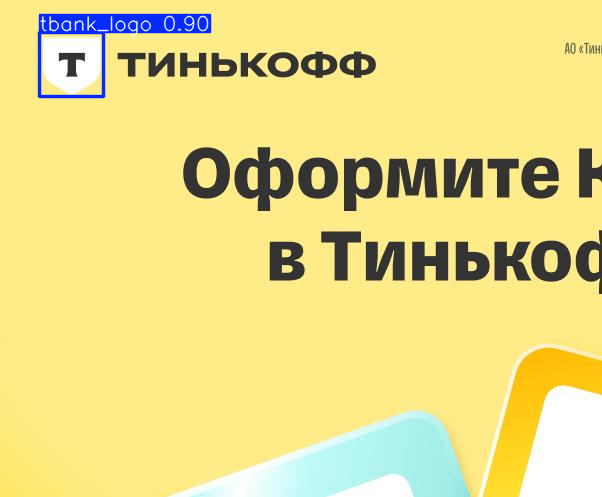

'result.jpg'

In [62]:
#model.val(data='tbank_dataset.yaml', split='val', imgsz=640)

results = model("tbank_dataset/images/val/eac749f5556796d1d013b9f18255bbf3.jpg")
results[0].show()
results[0].save(filename="result.jpg")

In [67]:
model.save('models/best.pt')